In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# Import our input dataset
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(50)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [2]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN'])
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Generate our categorical variable lists
application_df_unique = application_df.dtypes.index.tolist()
# Determine the number of unique values in each column.
application_df[application_df_unique].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
valuecount = application_df['APPLICATION_TYPE'].value_counts()
cutoff_value = 157
application_types_to_replace = valuecount[valuecount <= cutoff_value].index.tolist()
application_types_to_replace

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df["CLASSIFICATION"].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
valuecount_class = application_df["CLASSIFICATION"].value_counts()
# valuecount_class
valuecount_greater1 = valuecount_class[valuecount_class>1]
valuecount_greater1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

cutoff_value = 1000
classifications_to_replace = valuecount_class[valuecount_class <= cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df["NAME"].value_counts()

NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

In [12]:
# You may find it helpful to look at NAME value counts <10
valuecount_name = application_df["NAME"].value_counts()
# valuecount_class
valuecount_greater2 = valuecount_name[valuecount_name<11]
valuecount_greater2

NAME
CALIFORNIA WOMENS CHORUS                                                10
DISTRICT 21 AMERICAN CONTRACT BRIDGE LEAGUE                             10
UNION OF CALIFORNIA STATE WORKERS                                       10
BOYS TEAM CHARITY INC                                                   10
ANCIENT AND FREE ACCEPTED MASONS OF MISSOURI                            10
                                                                        ..
ST LOUIS SLAM WOMENS FOOTBALL                                            1
AIESEC ALUMNI IBEROAMERICA CORP                                          1
WEALLBLEEDRED ORG INC                                                    1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI     1
WATERHOUSE CHARITABLE TR                                                 1
Name: count, Length: 19364, dtype: int64

In [13]:
# Choose a cutoff value and create a list of Name to be replaced
# use the variable name `names_to_replace`

cutoff_value = 10
names_to_replace = valuecount_name[valuecount_name <= cutoff_value].index.tolist()

# Replace in dataframe
for cls in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['NAME'].value_counts()

NAME
Other                                                                     21202
PARENT BOOSTER USA INC                                                     1260
TOPS CLUB INC                                                               765
UNITED STATES BOWLING CONGRESS INC                                          700
WASHINGTON STATE UNIVERSITY                                                 492
                                                                          ...  
AMERICAN POSTAL WORKERS UNION                                                11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER       11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC                                     11
FINANCIAL PLANNING ASSOCIATION                                               11
SLOW FOOD U S A INC                                                          11
Name: count, Length: 205, dtype: int64

In [14]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`

df_encoded = pd.get_dummies(application_df)

# Display the encoded DataFrame
df_encoded

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [16]:
df_encoded.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL',
       'NAME_ACE MENTOR PROGRAM OF AMERICA INC', 'NAME_AIR FORCE ASSOCIATION',
       'NAME_ALABAMA FEDERATION OF WOMENS CLUBS',
       'NAME_ALABAMA TREASURE FOREST ASSOCIATION', 'NAME_ALPHA PHI SIGMA',
       'NAME_ALPHA PHI SIGMA INC', 'NAME_ALTRUSA INTERNATIONAL FOUNDATION INC',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=249)

In [17]:
# Split our preprocessed data into our features and target arrays
y = df_encoded["IS_SUCCESSFUL"].values
X = df_encoded.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Number of input features
input_features = len(X_train[0])

nn = Sequential()

# First hidden layer
nn.add(Dense(units=80, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(Dense(units=40, activation='relu'))

# Third hidden layer
nn.add(Dense(units=10, activation='relu'))


# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                19920     
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 23581 (92.11 KB)
Trainable params: 23581 (92.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile the model

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Create a callback to save model weights every five epochs
checkpoint_callback = ModelCheckpoint("model_weights_epoch_{epoch:02d}.h5", save_weights_only=True, save_freq=5)

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[checkpoint_callback])

Epoch 1/50
804/804 [==============================] - 5s 4ms/step - loss: 0.4811 - accuracy: 0.7648
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4475 - accuracy: 0.7833
Epoch 3/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4424 - accuracy: 0.7852
Epoch 4/50
804/804 [==============================] - 4s 5ms/step - loss: 0.4401 - accuracy: 0.7862
Epoch 5/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4390 - accuracy: 0.7861
Epoch 6/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4381 - accuracy: 0.7894
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4370 - accuracy: 0.7878
Epoch 8/50
804/804 [==============================] - 4s 5ms/step - loss: 0.4368 - accuracy: 0.7886
Epoch 9/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4363 - accuracy: 0.7881
Epoch 10/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4353 - accuracy: 0.7891

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4574 - accuracy: 0.7802 - 712ms/epoch - 3ms/step
Loss: 0.457367867231369, Accuracy: 0.7801749110221863


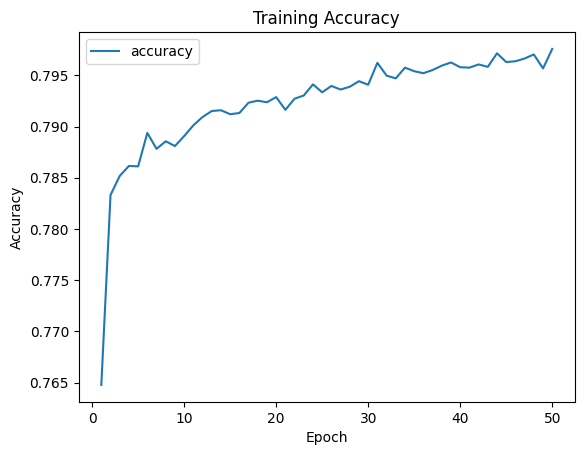

In [24]:
import matplotlib.pyplot as plt
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [25]:
from google.colab import files

# Export our model to HDF5 file
nn.save("AlphabetSoupCharity6.h5")

# Download the model to local machine
files.download("AlphabetSoupCharity6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>